# Classification Problem

#### Create a model for predicting the genre of a song.

## Setup

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
train = pd.read_csv("Train.csv")

In [5]:
train.shape

(453, 15)

In [6]:
train.columns

Index(['Id', 'title', 'artist', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live',
       'val', 'dur', 'acous', 'spch', 'pop', 'top genre'],
      dtype='object')

In [7]:
train.isnull().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [8]:
train_c=train.dropna()

In [9]:
train_c.isnull().sum()

Id           0
title        0
artist       0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
top genre    0
dtype: int64

In [10]:
train_c = train_c.drop(['title', 'artist'],  axis=1)

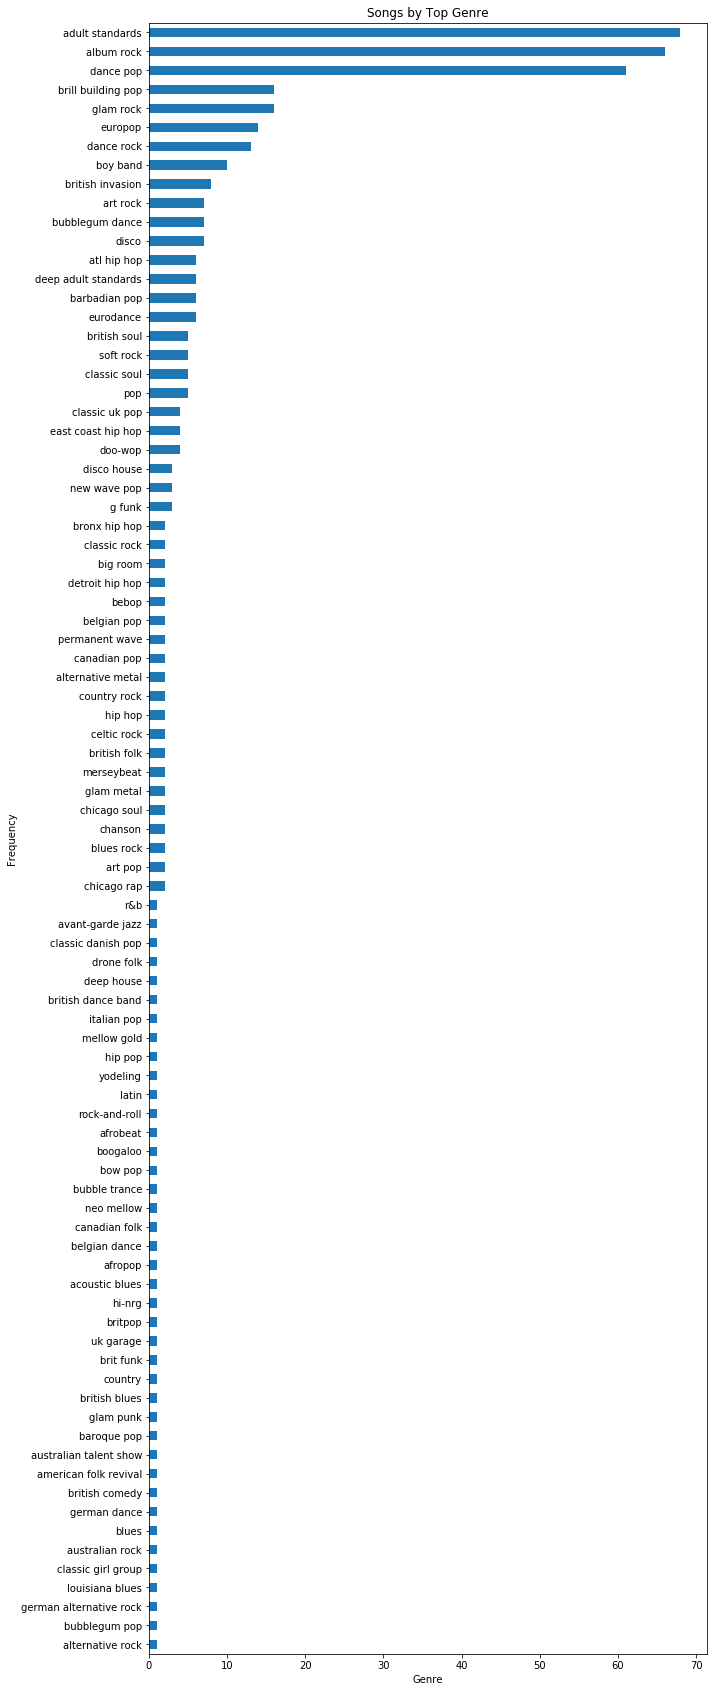

In [11]:
train_c['top genre'].value_counts().sort_values().plot.barh()
plt.title('Songs by Top Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.gcf().set_size_inches(10, 30)
plt.show()

In [12]:
train_c.columns

Index(['Id', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop', 'top genre'],
      dtype='object')

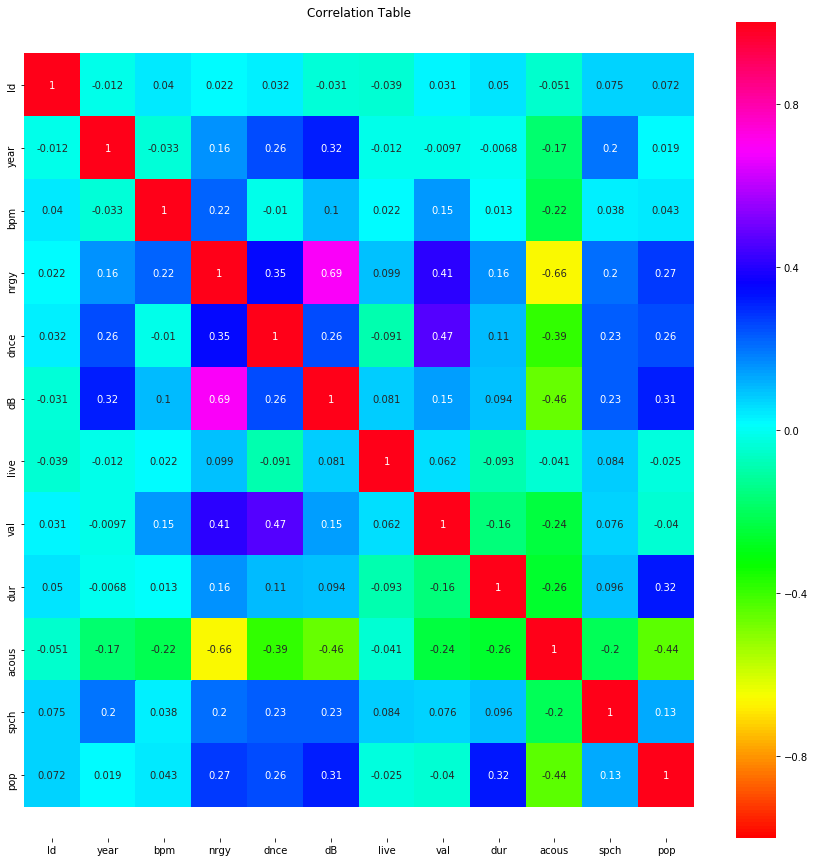

In [13]:
corr = train_c.iloc[:, :12].corr()
figure(figsize=(15,15))
ax = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'hsv')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Table')
plt.show()

## Train/Test Split

In [14]:
from sklearn import datasets


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_c.head(2)

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,3,1979,105,36,63,-9,13,67,245,11,3,77,adult standards


In [17]:
train_c.columns

Index(['Id', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop', 'top genre'],
      dtype='object')

In [18]:
train_c.dtypes

Id            int64
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
top genre    object
dtype: object

In [19]:
X, y = train_c[['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop']], train_c['top genre']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(350, 11)

In [22]:
X_test.shape

(88, 11)

## Classifiers

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.metrics import classification_report as cr

#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
for a in range(1, 60):
    tree_clf = DecisionTreeClassifier(max_depth=a, criterion="entropy")
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    print(a, accuracy_score(y_test, y_pred))

1 0.19318181818181818
2 0.3181818181818182
3 0.3068181818181818
4 0.29545454545454547
5 0.3181818181818182
6 0.2840909090909091
7 0.23863636363636365
8 0.26136363636363635
9 0.20454545454545456
10 0.2159090909090909
11 0.18181818181818182
12 0.18181818181818182
13 0.20454545454545456
14 0.2159090909090909
15 0.18181818181818182
16 0.19318181818181818
17 0.22727272727272727
18 0.17045454545454544
19 0.20454545454545456
20 0.18181818181818182
21 0.22727272727272727
22 0.20454545454545456
23 0.22727272727272727
24 0.17045454545454544
25 0.22727272727272727
26 0.23863636363636365
27 0.1590909090909091
28 0.19318181818181818
29 0.20454545454545456
30 0.19318181818181818
31 0.20454545454545456
32 0.20454545454545456
33 0.2159090909090909
34 0.17045454545454544
35 0.17045454545454544
36 0.20454545454545456
37 0.22727272727272727
38 0.2159090909090909
39 0.20454545454545456
40 0.20454545454545456
41 0.18181818181818182
42 0.20454545454545456
43 0.20454545454545456
44 0.19318181818181818
45 0.1

In [27]:
tree_clf = DecisionTreeClassifier(max_depth=5, criterion="entropy")
tree_clf.fit(X_train, y_train)
y_pred1 = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__, accuracy_score(y_test, y_pred1))
print(tree_clf.__class__.__name__, cr(y_test, y_pred1))

DecisionTreeClassifier 0.3181818181818182
DecisionTreeClassifier                       precision    recall  f1-score   support

     adult standards       0.39      0.44      0.41        16
          album rock       0.29      0.70      0.41        10
    alternative rock       0.00      0.00      0.00         1
             art pop       0.00      0.00      0.00         0
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
     australian rock       0.00      0.00      0.00         0
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.33      0.33      0.33         3
    

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### SVM

In [28]:
from sklearn.svm import SVC

In [29]:
svm_clf = SVC(decision_function_shape='ovo', probability=True)
svm_clf.fit(X_train, y_train)
y_pred2 = svm_clf.predict(X_test)
print(svm_clf.__class__.__name__, accuracy_score(y_test, y_pred2))
print(svm_clf.__class__.__name__, cr(y_test, y_pred2))

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.125
SVC                       precision    recall  f1-score   support

     adult standards       1.00      0.06      0.12        16
          album rock       0.11      1.00      0.21        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.00      0.00      0.00         3
    british invasion       0.00      0.00      0.00         1
        british soul       0.00      0.00      0.00         1
        canadian pop       0.00      0.00      0.00    

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rnd_clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=200, criterion="gini")
rnd_clf.fit(X_train, y_train)
y_pred3 = rnd_clf.predict(X_test)
print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred3))
print(rnd_clf.__class__.__name__, cr(y_test, y_pred3))

RandomForestClassifier 0.36363636363636365
RandomForestClassifier                       precision    recall  f1-score   support

     adult standards       0.41      0.69      0.51        16
          album rock       0.33      0.90      0.49        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.00      0.00      0.00         3
    british invasion       0.00      0.00      0.00         1
        british soul       0.00      0.00      0.00         1
   

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_clf = LogisticRegression(penalty = "l2", class_weight = None)
log_clf.fit(X_train, y_train)
y_pred4 = log_clf.predict(X_test)
print(log_clf.__class__.__name__, accuracy_score(y_test, y_pred4))
print(log_clf.__class__.__name__, cr(y_test, y_pred4))

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression 0.23863636363636365
LogisticRegression                          precision    recall  f1-score   support

        adult standards       0.52      0.69      0.59        16
                afropop       0.00      0.00      0.00         0
             album rock       0.12      0.30      0.18        10
       alternative rock       0.00      0.00      0.00         1
  american folk revival       0.00      0.00      0.00         0
               art rock       0.00      0.00      0.00         3
            atl hip hop       0.00      0.00      0.00         2
       avant-garde jazz       0.00      0.00      0.00         1
          barbadian pop       0.00      0.00      0.00         1
                  bebop       0.00      0.00      0.00         2
          belgian dance       0.00      0.00      0.00         0
            belgian pop       0.00      0.00      0.00         1
                  blues       0.00      0.00      0.00         1
               boy band       0

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Multi-Layer Perceptron

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
mlp_clf = MLPClassifier(activation = "tanh", learning_rate = "adaptive")
mlp_clf.fit(X_train, y_train)
y_pred5 = mlp_clf.predict(X_test)
print(mlp_clf.__class__.__name__, accuracy_score(y_test, y_pred5))
print(mlp_clf.__class__.__name__, cr(y_test, y_pred5))

MLPClassifier 0.26136363636363635
MLPClassifier                       precision    recall  f1-score   support

     adult standards       0.41      0.69      0.51        16
          album rock       0.18      0.70      0.29        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.00      0.00      0.00         3
    british invasion       0.00      0.00      0.00         1
        british soul       0.00      0.00      0.00         1
        canadian pop 

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### K-Nearest-Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_clf = KNeighborsClassifier(n_neighbors = 11, algorithm = "kd_tree")
knn_clf.fit(X_train, y_train)
y_pred6 = knn_clf.predict(X_test)
print(knn_clf.__class__.__name__, accuracy_score(y_test, y_pred6))
print(knn_clf.__class__.__name__, cr(y_test, y_pred6))

KNeighborsClassifier 0.32954545454545453
KNeighborsClassifier                       precision    recall  f1-score   support

     adult standards       0.44      0.69      0.54        16
          album rock       0.22      0.80      0.35        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       1.00      0.50      0.67         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.00      0.00      0.00         3
    british invasion       0.00      0.00      0.00         1
        british soul       0.00      0.00      0.00         1
     bu

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nvb_clf = GaussianNB()
nvb_clf.fit(X_train, y_train)
y_pred7 = nvb_clf.predict(X_test)
print(nvb_clf.__class__.__name__, accuracy_score(y_test, y_pred7))
print(nvb_clf.__class__.__name__, cr(y_test, y_pred7))

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


GaussianNB 0.17045454545454544
GaussianNB                       precision    recall  f1-score   support

     adult standards       0.31      0.31      0.31        16
          album rock       0.14      0.20      0.17        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.33      0.33      0.33         3
    british invasion       0.00      0.00      0.00         1
        british soul       0.00      0.00      0.00         1
     bubblegum dance       

#### Ensemble

In [40]:
from sklearn.ensemble import VotingClassifier

In [41]:
voting_clf = VotingClassifier(estimators=[("tree", tree_clf), ("supp", svm_clf), ("forest", rnd_clf), ("log", log_clf), ("percept", mlp_clf), ("neighbour", knn_clf), ("bayes", nvb_clf)],voting='hard')
voting_clf.fit(X_train, y_train)
y_pred8 = voting_clf.predict(X_test)
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred8))
print(voting_clf.__class__.__name__, cr(y_test, y_pred8))

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier 0.36363636363636365
VotingClassifier                       precision    recall  f1-score   support

     adult standards       0.48      0.69      0.56        16
          album rock       0.26      1.00      0.42        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.00      0.00      0.00         3
    british invasion       0.00      0.00      0.00         1
        british soul       0.00      0.00      0.00         1
     bubblegum 

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [42]:
voting2_clf = VotingClassifier(estimators=[("tree", tree_clf), ("supp", svm_clf), ("forest", rnd_clf), ("log", log_clf), ("percept", mlp_clf), ("neighbour", knn_clf), ("bayes", nvb_clf)]
                              ,voting='soft')
voting2_clf.fit(X_train, y_train)
y_pred9 = voting2_clf.predict(X_test)
print(voting2_clf.__class__.__name__, accuracy_score(y_test, y_pred9))
print(voting2_clf.__class__.__name__, cr(y_test, y_pred9))

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier 0.3409090909090909
VotingClassifier                       precision    recall  f1-score   support

     adult standards       0.41      0.56      0.47        16
          album rock       0.25      0.80      0.38        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.33      0.33      0.33         3
    british invasion       0.00      0.00      0.00         1
        british soul       0.00      0.00      0.00         1
     bubblegum d

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Comparison Analysis

In [47]:
scores = []
for a in [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9]:
    scores.append([accuracy_score(y_test, a), precision_score(y_test, a, average = "macro"), recall_score(y_test, a, average = "macro")])

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [51]:
df = pd.DataFrame(scores, columns = ["Accuracy", "Precision", "Recall"])
df.index = ["Decision Tree", "Support Vector", "Random Forest", "Logistic Regression", 
            "Perceptron", "K-Nearest-Neighbours", "Naïve Bayes", "Hard Voting", "Soft Voting"]
df

,Accuracy,Precision,Recall
Decision Tree,0.318182,0.047524,0.071127
Support Vector,0.125000,0.032792,0.031250
Random Forest,0.363636,0.032167,0.073840
Logistic Regression,0.238636,0.032062,0.055660
Perceptron,0.261364,0.023946,0.052121
K-Nearest-Neighbours,0.329545,0.090349,0.102940
Naïve Bayes,0.170455,0.042314,0.071216
Hard Voting,0.363636,0.033271,0.072390
Soft Voting,0.340909,0.069014,0.101200


## Export Solutions

In [163]:
test = pd.read_csv("Test.csv")

In [164]:
test.shape

(113, 14)

In [165]:
test.isnull().sum()

Id        0
title     0
artist    0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
dtype: int64

In [166]:
test = test.drop(['title', 'artist'],  axis=1)

In [287]:
for a in [voting_clf2]:
    predictions = a.predict(test[['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop']])
    solution = test
    solution["top genre"] = predictions
    solution = solution[["Id", "top genre"]]
    print(solution.head())
    solution.to_csv("SOFT_VOTING", index=False)

    Id        top genre
0  454        dance pop
1  455       album rock
2  456  adult standards
3  457        dance pop
4  458  adult standards
